# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [21]:
import pandas as pd
import numpy as np
import os
import plotly
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score,  StratifiedKFold
from sklearn import set_config
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
used_cars_df = pd.read_csv("/Users/apoorvaacharya/Documents/Projects/AI Journey/Berkeley/Practical2/practical_application_II_starter/data/vehicles.csv")
used_cars_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

<span style="color:blue">
    <h2> Analysis Processing Summary: </h2>

1. There are 426880 unique records of cars.
2. Descriptors variables like VIN, drive, type, size, paint color, condition & cylinders seems have 30% or less data. These variables do not change much for a car as well and hence have been excluded these from the analysis.
3. Amongst numeric columns (odometer, price, , year), no fetures are highly correlated to price. Hence, no features are removed.
4. Removed "ID, VIN, model" variables which have high cardinality.

    <h3>  Data Obersvations </h3>

1. Price seems to be in increasing trend post year - 2000
2. States - California followed by Oregon and Delaware has highest prices 
2. Manufactures - Toyota, Chevolet and Meercedes-benz has highest sale prices 
    
   </span>

In [3]:
used_cars_df.loc[used_cars_df['VIN'] =='WBA4J1C58KBM14708']

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
72471,7301707198,boulder,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,co
329989,7302122639,harrisburg,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,pa
330972,7301991596,lancaster,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,pa
341599,7302177201,york,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,pa
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [4]:
used_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
## Correlation matrix of numeric columns to price

used_cars_df.corr()

,id,price,year,odometer
id,1.000000,-0.002779,-0.059040,0.010721
price,-0.002779,1.000000,-0.004925,0.010032
year,-0.059040,-0.004925,1.000000,-0.157215
odometer,0.010721,0.010032,-0.157215,1.000000


In [6]:
size_df = pd.DataFrame(used_cars_df.isna().sum()/426880, columns=['null_perc']).reset_index()
null_cols = (size_df[size_df['null_perc'] > 0.30]['index']).tolist()
used_cars_df_processed = used_cars_df.drop(null_cols, axis=1)
print(f"Dropped columns with over 30% null rows {null_cols}")

used_cars_df_processed.drop(["id", "model"], axis=1, inplace = True)
used_cars_df_processed

Dropped columns with over 30% null rows ['condition', 'cylinders', 'VIN', 'drive', 'size', 'paint_color']


,region,price,year,manufacturer,fuel,odometer,title_status,transmission,type,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,gas,32226.0,clean,other,sedan,wy
426876,wyoming,30590,2020.0,volvo,gas,12029.0,clean,other,sedan,wy
426877,wyoming,34990,2020.0,cadillac,diesel,4174.0,clean,other,hatchback,wy
426878,wyoming,28990,2018.0,lexus,gas,30112.0,clean,other,sedan,wy


In [7]:
used_cars_df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   fuel          423867 non-null  object 
 5   odometer      422480 non-null  float64
 6   title_status  418638 non-null  object 
 7   transmission  424324 non-null  object 
 8   type          334022 non-null  object 
 9   state         426880 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 32.6+ MB


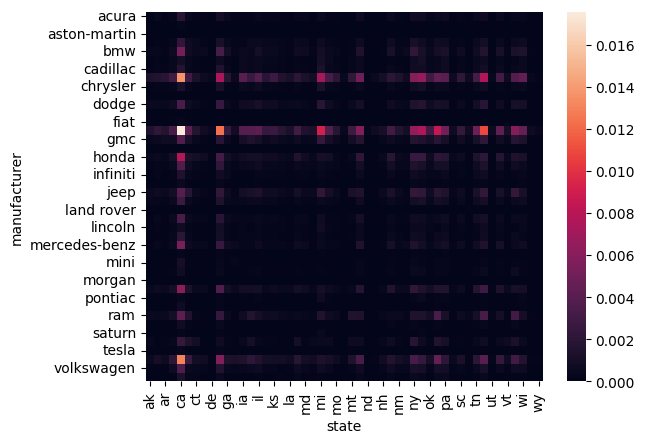

In [14]:
### frequency mapping between manufacturer and state - no conclusions on the data

fig = sns.heatmap(pd.crosstab(used_cars_df.manufacturer, used_cars_df.state, normalize = True))
plt.savefig("crosstab_manufactuer_state.png") 

In [9]:
print(f"# of unique Regions {len(used_cars_df_processed['region'].unique().tolist())}\
, \n # of unique States {len(used_cars_df_processed['state'].unique().tolist())}\
, \n # of unique Cars {len(used_cars_df['VIN'].unique().tolist())}\
, \n # of unique Manufacturers {len(used_cars_df['manufacturer'].unique().tolist())}")

# of unique Regions 404, 
 # of unique States 51, 
 # of unique Cars 118247, 
 # of unique Manufacturers 43


In [25]:
### aggregarting price over year to see if there is any trend of price by time

year_df = used_cars_df_processed[['year','price']].groupby('year')['price'].sum().reset_index()

fig1= px.line(year_df, x="year", y="price", title='Price trend by year')

# html file
plotly.offline.plot(fig1, filename="/Users/apoorvaacharya/Documents/Projects/AI Journey/Berkeley/Practical2/practical_application_II_starter/images/PriceTrendbyYear.html")
#fig1.savefig("crosstab_manufactuer_state.png") 



'/Users/apoorvaacharya/Documents/Projects/AI Journey/Berkeley/Practical2/practical_application_II_starter/images/PriceTrendbyYear.html'

In [28]:
### aggregarting price over state to explore prices by state

state_df = used_cars_df_processed[['state','price']].groupby('state')['price'].sum().reset_index().sort_values(by=['price'], ascending = False)


fig2 = px.bar(state_df, x="state", y="price", title='Price trend by State')

fig2.write_image("./images/PriceTrendbyState.png")
plotly.offline.plot(fig2, filename="/Users/apoorvaacharya/Documents/Projects/AI Journey/Berkeley/Practical2/practical_application_II_starter/images/PriceTrendbyState.html")

fig.show()

In [29]:
### aggregarting price over manufacturer to explore prices by state

manufacturer_df = used_cars_df_processed[['manufacturer','price']].groupby('manufacturer')['price'].sum().reset_index().sort_values(by=['price'], ascending = False)

fig3 = px.bar(manufacturer_df, x="manufacturer", y="price", title='Price trend by Manufacturer')

plotly.offline.plot(fig3, filename="/Users/apoorvaacharya/Documents/Projects/AI Journey/Berkeley/Practical2/practical_application_II_starter/images/PriceTrendbyManufacturer.html")


'/Users/apoorvaacharya/Documents/Projects/AI Journey/Berkeley/Practical2/practical_application_II_starter/images/PriceTrendbyManufacturer.html'

In [30]:
#px.bar(used_cars_df.query("`year` >= 2000"), x="year", y="price", color= "manufacturer", title='Price trend by year')

### Subsetting the dataset to include only the states where the sum of sale price is more than the mean 

selected_states = state_df.loc[state_df['price']> state_df['price'].mean()]['state'].values.tolist()

used_cars_df_processed_subset = used_cars_df_processed.loc[used_cars_df_processed['state'].isin(selected_states)]

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

<span style="color:blue">
    <h2> Analysis Processing Summary: </h2>

1. There are 2 unique numeric columns in the dataset.
2. Eight categorical variables - 'region', 'manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state'
3. "Year' is an ordinal feature
4. I created a column transformer to a) standardize / scale the number values from 0 to 1 and b) One hot encoded the categorical columns. Left with a transformed dataframe with 532 features
</span>

In [31]:
## dropping all na rows 
used_cars_df_processed_subset.dropna(inplace=True)

In [32]:
### creating a list of numeric columns and categorical columns seperately

numeric_cols = used_cars_df_processed_subset.select_dtypes(include=np.number).drop(['year'], axis=1).columns.tolist()
categorical_cols = used_cars_df_processed_subset.select_dtypes(exclude=np.number).columns.tolist()
print("\n Numeric columns", numeric_cols)
print("\n Categorical columns", categorical_cols)



 Numeric columns ['price', 'odometer']

 Categorical columns ['region', 'manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


In [33]:
## Preprocessing

### using a column transformer with standard scalar and onehot encoder to normalize and encode columns respectively

coltransformer = ColumnTransformer(transformers=[('standardscaler', StandardScaler(), numeric_cols),
                                ('Onehot', OneHotEncoder(), categorical_cols)], remainder='passthrough')
coltransformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['price', 'odometer']),
                                ('Onehot', OneHotEncoder(),
                                 ['region', 'manufacturer', 'fuel',
                                  'title_status', 'transmission', 'type',
                                  'state'])])

In [34]:
### transformed dataframe has 532 columns 
used_cars_df_transformed = pd.DataFrame(coltransformer.fit_transform(used_cars_df_processed_subset).toarray(), columns=coltransformer.get_feature_names_out())
used_cars_df_transformed

,standardscaler__price,standardscaler__odometer,Onehot__region_SF bay area,Onehot__region_albany,Onehot__region_annapolis,Onehot__region_athens,Onehot__region_atlanta,Onehot__region_auburn,Onehot__region_augusta,Onehot__region_bakersfield,...,Onehot__state_al,Onehot__state_ca,Onehot__state_de,Onehot__state_ga,Onehot__state_in,Onehot__state_md,Onehot__state_nj,Onehot__state_or,Onehot__state_tn,remainder__year
0,-0.004131,-0.164755,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0
1,-0.004895,-0.100231,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010.0
2,-0.003715,-0.352726,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0
3,-0.004312,-0.246217,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0
4,-0.005422,0.175065,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,-0.005956,-0.160017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1970.0
82786,-0.004312,-0.407348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0
82787,-0.004312,-0.298138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0
82788,-0.004728,-0.206987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2012.0


In [35]:
used_cars_df_transformed_ = used_cars_df_transformed.dropna()
used_cars_df_transformed_

,standardscaler__price,standardscaler__odometer,Onehot__region_SF bay area,Onehot__region_albany,Onehot__region_annapolis,Onehot__region_athens,Onehot__region_atlanta,Onehot__region_auburn,Onehot__region_augusta,Onehot__region_bakersfield,...,Onehot__state_al,Onehot__state_ca,Onehot__state_de,Onehot__state_ga,Onehot__state_in,Onehot__state_md,Onehot__state_nj,Onehot__state_or,Onehot__state_tn,remainder__year
0,-0.004131,-0.164755,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0
1,-0.004895,-0.100231,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010.0
2,-0.003715,-0.352726,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0
3,-0.004312,-0.246217,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0
4,-0.005422,0.175065,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,-0.005956,-0.160017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1970.0
82786,-0.004312,-0.407348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0
82787,-0.004312,-0.298138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0
82788,-0.004728,-0.206987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2012.0


In [36]:
### Y is independent variable for supervised/unsupervised model learning which is price
### X is all other features expect the predictor label - price

y = used_cars_df_transformed['standardscaler__price']
X = used_cars_df_transformed.drop(["standardscaler__price"], axis=1)

In [37]:
### splitting dataset in 75% train and 25% of test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42 )

In [38]:
X_train.isna().sum()

standardscaler__odometer      0
Onehot__region_SF bay area    0
Onehot__region_albany         0
Onehot__region_annapolis      0
Onehot__region_athens         0
                             ..
Onehot__state_md              0
Onehot__state_nj              0
Onehot__state_or              0
Onehot__state_tn              0
remainder__year               0
Length: 168, dtype: int64

In [ ]:
def sklearn_vif(exogs, data):

    # initialize dictionaries
    vif_dict = {}

    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict})

    return df_vif

sklearn_vif(X.columns, X).sort_values(by = "VIF", ascending = False)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Model 1: Simple Linear Regression ##

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

lr_pipe = Pipeline([
    ("regressor", LinearRegression())
])
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

lr_train_mse = mean_squared_error(lr_pipe.predict(X_train), y_train)
lr_test_mse = mean_squared_error(y_pred,y_test)
print("\nTrain_mse:", lr_train_mse)
print("\nTest_mse:", lr_test_mse)


### Parameters being tuned for grib search are copy_X' and fit_intercept for Linear regression
param_lr_grid = { 'regressor__copy_X': [True, False], 'regressor__fit_intercept': [True, False]}

grid = GridSearchCV(lr_pipe, param_lr_grid, cv = 5, refit = True)
grid.fit(X_train, y_train)
lr_train_mse = mean_squared_error(grid.predict(X_train), y_train)
lr_test_mse = mean_squared_error(grid.predict(X_test), y_test)


print("\nTrain_mse:", lr_train_mse)
print("\nTest_mse:", lr_test_mse)
print(f"Linear Regression Best (Mean) Score", grid.best_score_)
print("Linear Regression Best Params after Grid Search", grid.best_params_,'%')
linear_cv_results = pd.DataFrame(grid.cv_results_)

linear_cv_results


Train_mse: 1.330903156358401

Test_mse: 0.0025946287526753343

Train_mse: 1.330903154461192

Test_mse: 0.002594596707754789
Linear Regression Best (Mean) Score -1109.3897416988384
Linear Regression Best Params after Grid Search {'regressor__copy_X': True, 'regressor__fit_intercept': False} %


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__copy_X,param_regressor__fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.744522,0.111387,0.105340,0.049279,True,True,"{'regressor__copy_X': True, 'regressor__fit_in...",-3421.072992,-0.005824,-0.003243,-2127.656809,-0.000529,-1109.747879,1419.363388,3
1,0.760625,0.120269,0.079926,0.030305,True,False,"{'regressor__copy_X': True, 'regressor__fit_in...",-3419.339659,-0.005824,-0.003242,-2127.599455,-0.000529,-1109.389742,1418.790693,1
2,0.892758,0.217412,0.125546,0.081709,False,True,"{'regressor__copy_X': False, 'regressor__fit_i...",-3421.072992,-0.005824,-0.003243,-2127.656809,-0.000529,-1109.747879,1419.363388,3
3,0.782418,0.112578,0.077305,0.033633,False,False,"{'regressor__copy_X': False, 'regressor__fit_i...",-3419.339659,-0.005824,-0.003242,-2127.599455,-0.000529,-1109.389742,1418.790693,1


In [41]:
lr_fig = px.line(data_frame=linear_cv_results, x = 'param_regressor__fit_intercept', y='mean_test_score', 
        title = "Change in MSE for parameter change in fit_intercept")

lr_fig.write_image("./images/MSEbyFit_intercept.png")


<span style="color:blue">
    <h2> Linear Regression Model 1 Result Summary: </h2>

1. Train mean squared error score is 1.330
2. Test mean squared error score is 0.0026
3. Mean Test Score of best estimator model is -1109.4

Given that we can say that model fits and predicts the data well wth low variance. 
However, cross validation picked the best with model with 'regressor__copy_X' = True & 'regressor__fit_intercept' = False
    
   </span>

### Model 2:  Lasso Regression with grid search ##


Train_mse: 1.3333311837078898

Test_mse: 5.0873557683405185e-05

Lasso Regression MAE after Grid Search -0.7007359672065854 %
Lasso Regression Best Score after Grid Search {'lasso_model__alpha': 1, 'lasso_model__max_iter': 50} %


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso_model__alpha,param_lasso_model__max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.165962,0.062710,0.079212,0.037381,1,50,"{'lasso_model__alpha': 1, 'lasso_model__max_it...",-0.008745,-0.013391,-0.014671,-0.008751,-0.024431,-0.013998,0.005741,1
1,0.175518,0.054643,0.042563,0.032317,1,100,"{'lasso_model__alpha': 1, 'lasso_model__max_it...",-0.008745,-0.013391,-0.014671,-0.008751,-0.024431,-0.013998,0.005741,1
2,0.154882,0.029954,0.069402,0.035675,1,250,"{'lasso_model__alpha': 1, 'lasso_model__max_it...",-0.008745,-0.013391,-0.014671,-0.008751,-0.024431,-0.013998,0.005741,1
3,0.166645,0.040165,0.027719,0.015540,100,50,"{'lasso_model__alpha': 100, 'lasso_model__max_...",-0.008745,-0.013391,-0.014671,-0.008751,-0.024431,-0.013998,0.005741,1
4,0.181036,0.042528,0.048486,0.021636,100,100,"{'lasso_model__alpha': 100, 'lasso_model__max_...",-0.008745,-0.013391,-0.014671,-0.008751,-0.024431,-0.013998,0.005741,1
5,0.234578,0.072577,0.045074,0.020884,100,250,"{'lasso_model__alpha': 100, 'lasso_model__max_...",-0.008745,-0.013391,-0.014671,-0.008751,-0.024431,-0.013998,0.005741,1
6,0.187209,0.043637,0.074345,0.043115,1000,50,"{'lasso_model__alpha': 1000, 'lasso_model__max...",-0.008745,-0.013391,-0.014671,-0.008751,-0.024431,-0.013998,0.005741,1
7,0.164495,0.038009,0.041501,0.020838,1000,100,"{'lasso_model__alpha': 1000, 'lasso_model__max...",-0.008745,-0.013391,-0.014671,-0.008751,-0.024431,-0.013998,0.005741,1
8,0.176932,0.055635,0.072496,0.056388,1000,250,"{'lasso_model__alpha': 1000, 'lasso_model__max...",-0.008745,-0.013391,-0.014671,-0.008751,-0.024431,-0.013998,0.005741,1


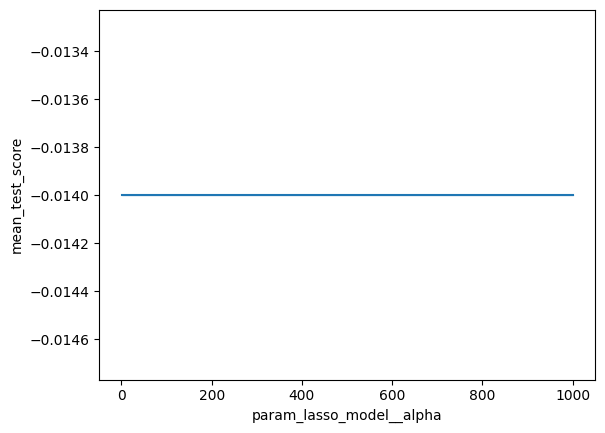

In [42]:
lasso_pipe = Pipeline([
    #("transformer", transformer),
    #("selector", SequentialFeatureSelector(Lasso())),
    ("lasso_model", Lasso())
    
])


### Parameters being tuned for grib search are alpha and max_iter for lasso
parameter_grid_lasso = {'lasso_model__alpha': [1,100,1000], 
                  'lasso_model__max_iter': [50, 100, 250]}
                       # 'selector__n_features_to_select': [25, 50]}

lasso_gridsearch = GridSearchCV(lasso_pipe, param_grid=parameter_grid_lasso ,scoring='neg_mean_absolute_error',  cv = 5, refit=True)
lasso_gridsearch.fit(X_train, y_train)

lasso_train_mse = mean_squared_error(lasso_gridsearch.predict(X_train), y_train)
lasso_test_mse = mean_squared_error(lasso_gridsearch.predict(X_test), y_test)
#print("\nRidge_model params", ridge_pipe.get_params())


print("\nTrain_mse:", lasso_train_mse)
print("\nTest_mse:", lasso_test_mse)
print("\nLasso Regression MAE after Grid Search", lasso_gridsearch.score(X_test, y_test)*100,'%')
print("Lasso Regression Best Score after Grid Search", lasso_gridsearch.best_params_,'%')
lasso_cv_results = pd.DataFrame(lasso_gridsearch.cv_results_)
#print("\nCV Results of best model\n", lasso_cv_results)

sns.lineplot(y=lasso_cv_results['mean_test_score'], x = lasso_cv_results['param_lasso_model__alpha'])
lasso_cv_results

<span style="color:blue">
    <h2>Lasso Regression Model 2 Result Summary:</h2>
    

1. Train mean absolute score is 1.3333
2. Test mean absolute score is 0.00005087
Given that we can say that lasso model overfits the test data wth low variance. 
However, cross validation did not help here in arriving at the better model.
    
 </span>.

### Model 3: Regression with FeatureSelection- Cancelling it due to high run time ##

In [43]:
'''
### Regression with FeatureSelection ###

params_features = {"selector__n_features_to_select": [25, 50]}
selector_model = Pipeline([
    #("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("selector",  SequentialFeatureSelector(LinearRegression())),
    ("model", LinearRegression())
    
])

### Regularization with grid search ###

gridsearch_selector_model = GridSearchCV(selector_model, param_grid=params_features , cv = 5, refit=True)

gridsearch_selector_model.fit(X_train, y_train)

poly_train_mse = mean_squared_error(gridsearch_selector_model.predict(X_train), y_train)
poly_test_mse = mean_squared_error(gridsearch_selector_model.predict(X_test), y_test)
#print("\nRidge_model params", ridge_pipe.get_params())


print("\nTrain_mse:", poly_train_mse)
print("\nTest_mse:", poly_test_mse)
print("\nPolynomial Regression Best Score after Grid Search", gridsearch_selector_model.best_score_*100,'%')
print("nPolynomial Regression Best Params after Grid Search", gridsearch_selector_model.best_params_,'%')
print("\nCV Results of best model", gridsearch_selector_model.cv_results_)
'''

'\n### Regression with FeatureSelection ###\n\nparams_features = {"selector__n_features_to_select": [25, 50]}\nselector_model = Pipeline([\n    #("poly", PolynomialFeatures(degree=2, include_bias=False)),\n    ("selector",  SequentialFeatureSelector(LinearRegression())),\n    ("model", LinearRegression())\n    \n])\n\n### Regularization with grid search ###\n\ngridsearch_selector_model = GridSearchCV(selector_model, param_grid=params_features , cv = 5, refit=True)\n\ngridsearch_selector_model.fit(X_train, y_train)\n\npoly_train_mse = mean_squared_error(gridsearch_selector_model.predict(X_train), y_train)\npoly_test_mse = mean_squared_error(gridsearch_selector_model.predict(X_test), y_test)\n#print("\nRidge_model params", ridge_pipe.get_params())\n\n\nprint("\nTrain_mse:", poly_train_mse)\nprint("\nTest_mse:", poly_test_mse)\nprint("\nPolynomial Regression Best Score after Grid Search", gridsearch_selector_model.best_score_*100,\'%\')\nprint("nPolynomial Regression Best Params after Gri

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

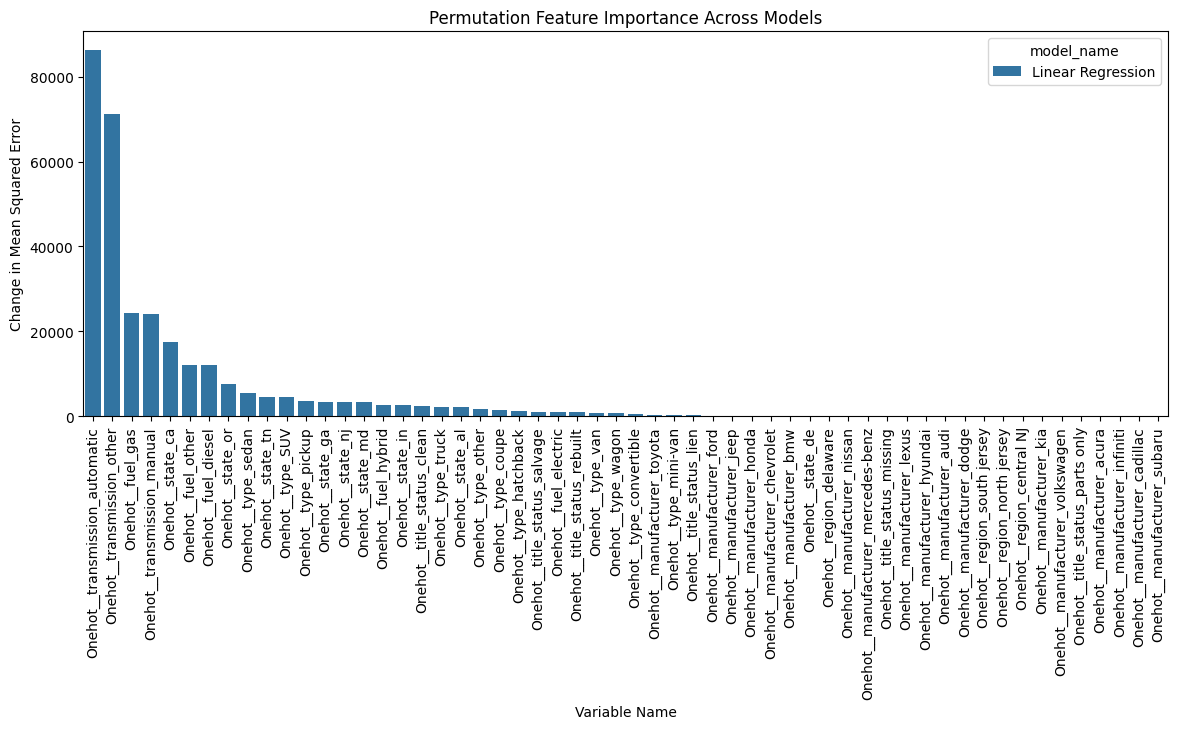

In [45]:
lr_test = permutation_importance(grid, X_test, y_test)
lasso_test = permutation_importance(lasso_gridsearch, X_test, y_test)
results = [lr_test, lasso_test]

# change name of the models as neccesary
names = [
    "Linear Regression", "Lasso Regularization"    ]

# extract data and names from permutation results
graph_data = {}
for result, name in zip(results, names):
    graph_data[name] = result['importances_mean']

# make final dataframe
graph_data = pd.DataFrame.from_dict(graph_data, orient='index', columns=X_test.columns)
graph_data.reset_index(inplace=True, drop=False)
graph_data.rename(columns={'index': 'model_name'}, inplace=True)
graph_data = graph_data.melt(id_vars='model_name')

### Taking only top variables with importance_mean > 50
graph_data_subset = graph_data.loc[graph_data["value"] >= 50.0].sort_values(by="value", ascending= False)

# create visual
plt.figure(figsize=[14,5])
#plt.axhline(0, c='black')
#[plt.axvline(i + 0.5, linestyle='--', c='black') for i in range(0, 22)]
pm_fig = sns.barplot(x=graph_data_subset['variable'], y=graph_data_subset['value'], hue=graph_data_subset['model_name'])
plt.title("Permutation Feature Importance Across Models")
plt.xlabel("Variable Name")
plt.ylabel("Change in Mean Squared Error")
plt.xticks(rotation=90)

plt.savefig("./images/Permutation_FeatureImportancefromLinearRegressionModel.png")

In [ ]:
#### Feature importances for Model 1: Linear regression Model based on permutation importances on train set

lr_train = permutation_importance(grid, X_train, y_train)

for i in lr_train.importances_mean.argsort()[::-1]:
    if lr_train.importances_mean[i] - 2 * lr_train.importances_std[i] > 0:
        print(f"{X_train.columns[i]:<8}"
              f"\t{lr_train.importances_mean[i]:.3f}"
              f" +/- {lr_train.importances_std[i]:.3f}")

In [ ]:
#### Feature importances for Model 1: Linear regression Model based on permutation importances on test set

for i in lr_test.importances_mean.argsort()[::-1]:
    if lr_test.importances_mean[i] - 2 * lr_test.importances_std[i] > 0:
        print(f"{X_test.columns[i]:<8}"
              f"\t{lr_test.importances_mean[i]:.3f}"
              f" +/- {lr_test.importances_std[i]:.3f}")

In [ ]:
#### Feature importances for Model 2: Lasso regression Model based on permutation importances 

for i in lasso_test.importances_mean.argsort()[::-1]:
    
    if lasso_test.importances_mean[i] - 3 * lasso_test.importances_std[i] > 0:
        print(f"{X_test.columns[i]:<8}"
              f"{lasso_test.importances_mean[i]:.3f}"
              f" +/- {lasso_test.importances_std[i]:.3f}")

<span style="color:blue">
<h2> Result Summary: </h2>

<h3> Linear Regression:  </h3>
        According to the permutance importance explanability technqiue, the top features that are predicting the price of the car are as follows along with importance means distribution:
        
    Onehot__transmission_automatic	85349.788 +/- 714.298
    Onehot__transmission_other	70844.010 +/- 564.025
    Onehot__fuel_gas	24690.415 +/- 88.144
    Onehot__transmission_manual	24282.890 +/- 159.345
    Onehot__state_ca	17396.574 +/- 139.410
    Onehot__fuel_diesel	12169.272 +/- 34.453
    Onehot__fuel_other	12123.653 +/- 90.304
    Onehot__state_or	7717.802 +/- 79.115
    Onehot__type_sedan	5377.304 +/- 51.382
    
   Since the models are not overfitting on the dataset, the results between the training and testing sets are consistent.
   </span>

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

<span style="color:blue">
<h2>Findings </h2>

    1. Customers are highly likely to buy high price cars n California.
    2. When the car is automatic, the price is selling for high prices.
    However, car transmission being manual or other, also yield high sales but lower by 4 times than automatic transmission cars.
    3. Further, amonsgt the fuel types, gas fuelled cars predict high sale price of the cars.
    4. Other state that predict high sale prices are oregan
    5. Customers are highly likely to buy high price for sedan cars.
   
    
    
</span>

# Archive

In [ ]:
###HistGradientBoostingRegressor ###

hist_model = Pipeline([
    ("hist_model", HistGradientBoostingRegressor(max_iter=100, max_bins=255))
])

hist_model.fit(X_train, y_train)

parameter_hist = {'hist_model__max_iter': [50,100], 
                  'hist_model__max_bins': [2, 255]}

gridsearch_poly = GridSearchCV(hist_model, param_grid=parameter_hist , cv =5, refit=True)
gridsearch_poly.fit(X_train, y_train)

hist_model_train_mse = mean_squared_error(gridsearch_poly.predict(X_train), y_train)
hist_model_test_mse = mean_squared_error(gridsearch_poly.predict(X_test), y_test)
#print("\nRidge_model params", ridge_pipe.get_params())


print("\nTrain_mse:", hist_model_train_mse)
print("\nTest_mse:", hist_model_test_mse)
#print("Polynomial Regression Best Score after Grid Search", gridsearch_poly.best_score_*100,'%')